In [9]:
import requests
import time
import pandas as pd

# base url
question_id = 328524632
limit = 20
offset = 0


def assemble_url(question_id, offset, limit = 20):
    return 'https://www.zhihu.com/api/v4/questions/' + str(question_id) + '/answers?include=content&limit=' + \
        str(limit) + '&offset=' + str(offset) + '&platform=desktop&sort_by=default'

def convert_answer_url(question_id, original_answer_url):
    _, answer_with_id = original_answer_url.split('v4/')
    return 'https://www.zhihu.com/question/' + str(question_id) + '/' + answer_with_id

def convert_author_url(author_url_token):
    return 'https://www.zhihu.com/people/' + author_url_token

def author_classifer(auther_gender):
    if auther_gender == 1:
        return '男'
    elif auther_gender == 0:
        return '女'
    else:
        return '未知'

# Mimic browser
headers = {'User-Agent': 'Mozilla/5.0 (Linux; Android 5.1.1; SM-G928X Build/LMY47X) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.83 Mobile Safari/537.36'}

# retrive one page to get basic information
url = assemble_url(question_id, offset = 0)
page = requests.get(url, headers=headers)

# retrieve raw source
raw = page.json()
total_reviews = raw['paging']['totals']

# column names
raw['data'][0].keys()

result = {
    'id': [],
    'question_title': [],
    'question_created': [],
    'question_updated_time': [],
    'author_name': [],
    'author_url': [],
    'author_avatar_url': [],
    'author_gender': [],
    'url': [],
    'created_time': [],
    'updated_time': [],
    'content': []
}

# Retrieve data
i = 0
while i < total_reviews:
    
    # print progress
    print('Current page: %d, total pages: %d, percent: %.2f%%' % (i, total_reviews, i * 100 / total_reviews))
    
    url = assemble_url(question_id, offset = i)
    page = requests.get(url, headers=headers)
    raw = page.json()
    
    # retrieve every page
    for data in raw['data']:
        
        # update result
        result['id'].append(data['id'])
        result['question_title'].append(data['question']['title'])
        result['question_created'].append(time.ctime(data['question']['created']))
        result['question_updated_time'].append(time.ctime(data['question']['updated_time']))
        result['author_name'].append(data['author']['name'])
        result['author_url'].append(convert_author_url(data['author']['url_token']))
        result['author_avatar_url'].append(data['author']['avatar_url'])
        result['author_gender'].append(author_classifer(data['author']['gender']))
        result['url'].append(convert_answer_url(question_id, data['url']))
        result['created_time'].append(time.ctime(data['created_time']))
        result['updated_time'].append(time.ctime(data['updated_time']))
        result['content'].append(data['content'])
    
    i += limit
print('Done')

source = pd.DataFrame()
source = source.from_dict(result)


Current page: 0, total pages: 3512, percent: 0.00%
Current page: 20, total pages: 3512, percent: 0.57%
Current page: 40, total pages: 3512, percent: 1.14%
Current page: 60, total pages: 3512, percent: 1.71%
Current page: 80, total pages: 3512, percent: 2.28%
Current page: 100, total pages: 3512, percent: 2.85%
Current page: 120, total pages: 3512, percent: 3.42%
Current page: 140, total pages: 3512, percent: 3.99%
Current page: 160, total pages: 3512, percent: 4.56%
Current page: 180, total pages: 3512, percent: 5.13%
Current page: 200, total pages: 3512, percent: 5.69%
Current page: 220, total pages: 3512, percent: 6.26%
Current page: 240, total pages: 3512, percent: 6.83%
Current page: 260, total pages: 3512, percent: 7.40%
Current page: 280, total pages: 3512, percent: 7.97%
Current page: 300, total pages: 3512, percent: 8.54%
Current page: 320, total pages: 3512, percent: 9.11%
Current page: 340, total pages: 3512, percent: 9.68%
Current page: 360, total pages: 3512, percent: 10.25

Current page: 3020, total pages: 3512, percent: 85.99%
Current page: 3040, total pages: 3512, percent: 86.56%
Current page: 3060, total pages: 3512, percent: 87.13%
Current page: 3080, total pages: 3512, percent: 87.70%
Current page: 3100, total pages: 3512, percent: 88.27%
Current page: 3120, total pages: 3512, percent: 88.84%
Current page: 3140, total pages: 3512, percent: 89.41%
Current page: 3160, total pages: 3512, percent: 89.98%
Current page: 3180, total pages: 3512, percent: 90.55%
Current page: 3200, total pages: 3512, percent: 91.12%
Current page: 3220, total pages: 3512, percent: 91.69%
Current page: 3240, total pages: 3512, percent: 92.26%
Current page: 3260, total pages: 3512, percent: 92.82%
Current page: 3280, total pages: 3512, percent: 93.39%
Current page: 3300, total pages: 3512, percent: 93.96%
Current page: 3320, total pages: 3512, percent: 94.53%
Current page: 3340, total pages: 3512, percent: 95.10%
Current page: 3360, total pages: 3512, percent: 95.67%
Current pa

In [10]:
source

,id,question_title,question_created,question_updated_time,author_name,author_url,author_avatar_url,author_gender,url,created_time,updated_time,content
0,782153883,生活中有没有特别绿茶的女生？,Sun Jun 9 07:20:48 2019,Sun Jun 9 07:20:48 2019,唐桃酒,https://www.zhihu.com/people/tang-tao-jiu-54,https://pic3.zhimg.com/v2-5eb9fa8591cf7ec00645...,女,https://www.zhihu.com/question/328524632/answe...,Sat Aug 10 01:53:26 2019,Mon Mar 2 00:51:15 2020,<p>我取匿了 手机通话录音有提示音，别问我为啥拿俩手机录了</p><p>辣鸡公众号未经我...
1,737225910,生活中有没有特别绿茶的女生？,Sun Jun 9 07:20:48 2019,Sun Jun 9 07:20:48 2019,喵先森,https://www.zhihu.com/people/miao-xian-sen-55,https://pic1.zhimg.com/31fff9094869eae5f0c6602...,男,https://www.zhihu.com/question/328524632/answe...,Thu Jul 4 06:31:30 2019,Thu Jul 4 06:31:30 2019,<p>有啊</p><p>天冷的时候还会把手放进我老公的裤腿里暖手</p><p>还一脸挑衅的看...
2,1085632170,生活中有没有特别绿茶的女生？,Sun Jun 9 07:20:48 2019,Sun Jun 9 07:20:48 2019,故事档案局,https://www.zhihu.com/people/gu-shi-dang-an-ju-71,https://pic2.zhimg.com/v2-c72f91fd918ee5c63ac9...,未知,https://www.zhihu.com/question/328524632/answe...,Tue Mar 17 12:10:19 2020,Thu Apr 9 18:12:31 2020,<p>杀死姐姐，抢走姐夫，把一切自己曾经没有过的东西占为己有。为了展开她的「复仇计划」，蛰伏...
3,788099384,生活中有没有特别绿茶的女生？,Sun Jun 9 07:20:48 2019,Sun Jun 9 07:20:48 2019,隔壁老汪的情人,https://www.zhihu.com/people/ge-bi-lao-wang-de...,https://pic1.zhimg.com/v2-fc54ad7954509c5f0731...,男,https://www.zhihu.com/question/328524632/answe...,Wed Aug 14 08:21:46 2019,Sat Feb 29 19:15:40 2020,<p>本命年的我手撕缠着我爸的绿茶，个别情节还是很刺激的。</p><p>我爸我妈都特喜欢打麻...
4,1059503720,生活中有没有特别绿茶的女生？,Sun Jun 9 07:20:48 2019,Sun Jun 9 07:20:48 2019,wEitiNg,https://www.zhihu.com/people/weiting-56,https://pic2.zhimg.com/v2-4692b1d71c4b1448ab00...,未知,https://www.zhihu.com/question/328524632/answe...,Fri Mar 6 03:07:19 2020,Fri Mar 6 03:12:25 2020,<p>来了来了！知乎上看这个话题不少，没想到真被我遇上了。亲身经历，真给我开了眼界了。</p...
5,853216064,生活中有没有特别绿茶的女生？,Sun Jun 9 07:20:48 2019,Sun Jun 9 07:20:48 2019,匿名用户,https://www.zhihu.com/people/,https://pic1.zhimg.com/aadd7b895_is.jpg,男,https://www.zhihu.com/question/328524632/answe...,Fri Oct 11 05:37:52 2019,Sat Mar 7 03:44:30 2020,<p>男友跟我刚接触时，总是提起小A的名字。经常不自觉和小A男友做对比，简直是从里到外的co...
6,769131533,生活中有没有特别绿茶的女生？,Sun Jun 9 07:20:48 2019,Sun Jun 9 07:20:48 2019,匿名用户,https://www.zhihu.com/people/,https://pic1.zhimg.com/aadd7b895_is.jpg,男,https://www.zhihu.com/question/328524632/answe...,Wed Jul 31 02:27:50 2019,Wed Dec 25 06:44:23 2019,<p>我对象用自己的硬盘帮我下日剧看，我看日剧的时候发现硬盘里还有一个文件夹是前女友，随便翻...
7,778606677,生活中有没有特别绿茶的女生？,Sun Jun 9 07:20:48 2019,Sun Jun 9 07:20:48 2019,匿名用户,https://www.zhihu.com/people/,https://pic1.zhimg.com/aadd7b895_is.jpg,男,https://www.zhihu.com/question/328524632/answe...,Wed Aug 7 07:55:45 2019,Fri Aug 9 15:54:17 2019,<p>有啊。</p><p>想不到我也能有今天来回答绿茶相关问题的一天。</p><p>今天七夕...
8,1109416863,生活中有没有特别绿茶的女生？,Sun Jun 9 07:20:48 2019,Sun Jun 9 07:20:48 2019,故事档案局,https://www.zhihu.com/people/gu-shi-dang-an-ju-71,https://pic2.zhimg.com/v2-c72f91fd918ee5c63ac9...,未知,https://www.zhihu.com/question/328524632/answe...,Fri Mar 27 13:55:28 2020,Fri Mar 27 13:55:28 2020,<p>大学寝室关系简直是考验人类忍耐力的第一关，东西南北性格迥异的人要朝夕相处四年，对于平时...
9,1115456983,生活中有没有特别绿茶的女生？,Sun Jun 9 07:20:48 2019,Sun Jun 9 07:20:48 2019,匿名用户,https://www.zhihu.com/people/,https://pic1.zhimg.com/aadd7b895_is.jpg,男,https://www.zhihu.com/question/328524632/answe...,Mon Mar 30 08:46:40 2020,Mon Apr 27 12:39:36 2020,<p>更:回答一下关于评论的疑惑，我们家在一个区，我爸工作在另一个区，所以我爸是不经常回家的...


# Analysis

In [11]:
print(source.iloc[0]['question_title'])

生活中有没有特别绿茶的女生？


In [12]:
source.groupby('author_gender')['id'].count()

author_gender
女      681
未知     665
男     2166
Name: id, dtype: int64

### word cloud

Content Assembling
HTML Element Removing
Removing Punctuation
Cutting Words start
Plotting Word Cloud


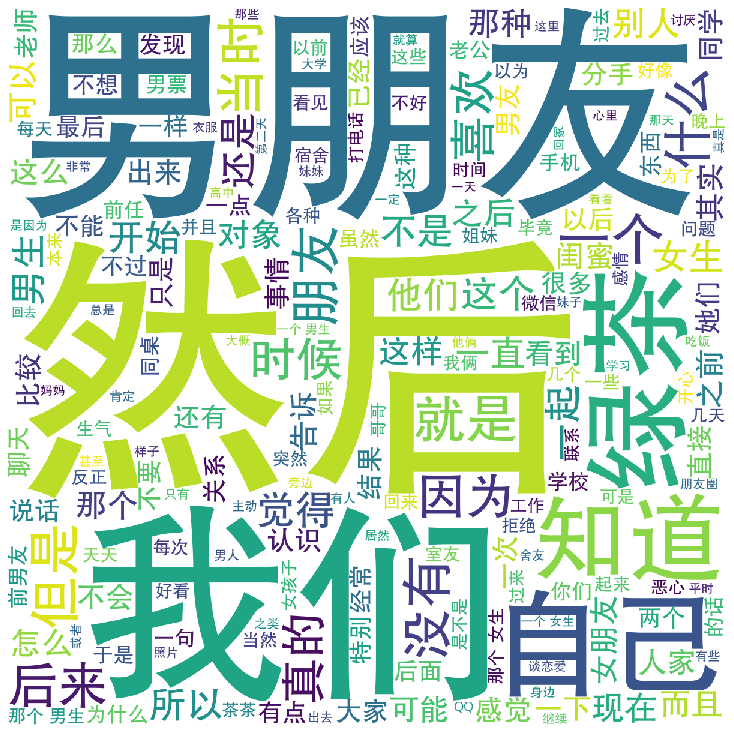

In [15]:
import html2text, jieba, warnings
import matplotlib.pyplot as plt
from wordcloud import WordCloud

warnings.filterwarnings("ignore")

# assemble data
print('Content Assembling')
all_word = ''.join(source['content'])
h = html2text.HTML2Text()

# remove html element
print('HTML Element Removing')
h.ignore_links = True
text = h.handle(all_word)

# remove punctuaction
print('Removing Punctuation')
text = ''.join(filter(str.isalpha, text))


# cut word
print('Cutting Words start')
seg_list = jieba.cut(text, cut_all=False)
text = " ".join(seg_list)

# plot word cloud
print('Plotting Word Cloud')
wordcloud = WordCloud(width = 1200, height = 1200,
                font_path='FZHTJW.TTF',
                background_color ='white',
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 